# Astana Real Estate Price Estimation 

## Importing libraries

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [28]:
# Load the data
data = pd.read_csv('data/merged_df.csv')
data.head(5)

,name,information,address,price,owner,complex_name,house_type,in_pledge,construction_year,ceiling_height,...,distance_to_botanical_garden,distance_to_triathlon_park,distance_to_astana_park,distance_to_treatment_facility,distance_to_railway_station_1,distance_to_railway_station_2,distance_to_industrial_zone,kzt_sq_m,last_floor,first_floor
0,"3-комнатная квартира, 77 м², 1/4 этаж","2018 г.п., санузел раздельный, ✅Полноценная 3 ...",Е 496 10,33000000,agent,kemel,monolithic,False,2018,2.5,...,3.703569,7.077784,9.179456,10.063298,13.597845,8.466373,11.385081,428571.428571,False,True
1,"1-комнатная квартира, 40 м², 3/14 этаж","жил. комплекс Jetisu.Lepsi, монолитный дом, 20...",Улы Дала — Ұлы дала,21000000,agent,jetisu.lepsi,monolithic,False,2023,3.0,...,4.259391,5.519950,8.360829,11.188389,12.702507,5.137294,8.162841,525000.000000,False,False
2,"1-комнатная квартира, 43.8 м², 6/18 этаж","жил. комплекс BURABAY, монолитный дом, 2022 г....",Ж. Нажимеденова 62 — А62,18500000,agent,burabay,monolithic,False,2022,2.7,...,8.341438,6.716751,9.661737,14.427095,13.096655,0.503983,3.685814,422374.429224,False,False
3,"3-комнатная квартира, 115 м², 5/7 этаж","жил. комплекс Отан 2, кирпичный дом, 2023 г.п....",Байтурсынова 46/2 — BINOM мектебі,51000000,agent,отан,brick,False,2023,2.8,...,7.089332,5.026506,7.936212,12.834399,11.394173,1.272144,3.486966,443478.260870,False,False
4,"2-комнатная квартира, 60 м², 13/14 этаж","жил. комплекс Hazar, монолитный дом, 2022 г.п....",Мангилик Ел 62 — Мангилик Ел и Фариза Онгарсы...,25000000,agent,hazar,monolithic,False,2022,2.7,...,2.443335,5.912639,7.919513,8.999760,12.334288,8.068332,10.760450,416666.666667,False,False


## Data preprocessing

In [4]:
display(data.describe())
object_columns = data.select_dtypes(include=['object'])
display(object_columns.describe())

,price,construction_year,ceiling_height,area,room_count,floor,floor_count,schools_within_500m,kindergartens_within_500m,distance_to_center,distance_to_botanical_garden,distance_to_triathlon_park,distance_to_astana_park,distance_to_treatment_facility,distance_to_railway_station_1,distance_to_railway_station_2,distance_to_industrial_zone,kzt_sq_m
count,1.843400e+04,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,1.843400e+04
mean,3.753080e+07,2014.570956,2.845770,68.830407,2.150754,6.672073,11.482315,1.219431,0.868070,5.559344,6.215202,5.757271,6.328550,8.984959,9.459152,9.277987,10.344068,5.119365e+05
std,4.049283e+07,11.506210,0.179282,41.743381,1.081651,4.389864,5.176433,2.112259,1.861288,45.952960,45.945742,45.963848,45.946631,45.849602,45.908033,45.995014,45.983420,1.693356e+05
min,4.000000e+06,1898.000000,2.000000,11.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.250284,0.519604,0.357386,0.328701,0.766380,0.000000,0.000000,0.382038,1.050420e+05
25%,2.000000e+07,2012.000000,2.700000,42.000000,1.000000,3.000000,9.000000,0.000000,0.000000,2.872140,2.431434,3.103447,3.393801,5.301223,6.358577,5.513721,6.290774,4.076923e+05
50%,2.700000e+07,2018.000000,2.800000,59.000000,2.000000,6.000000,10.000000,0.000000,0.000000,3.956213,4.816675,4.297644,4.691774,7.482007,8.077983,8.037209,9.401219,4.782609e+05
75%,4.050000e+07,2022.000000,3.000000,82.000000,3.000000,9.000000,14.000000,2.000000,1.000000,5.208025,6.759455,5.356048,6.368021,9.841432,10.306243,10.290037,11.364092,5.774648e+05
max,1.800000e+09,2026.000000,4.800000,773.300000,43.000000,41.000000,43.000000,15.000000,15.000000,2565.387251,2565.184867,2566.428367,2563.755468,2558.635747,2561.724357,2572.674709,2573.050681,6.000000e+06


,name,information,address,owner,complex_name,house_type,bathroom_info,condition,district,complex_class,parking,elevator,coordinates
count,18434,18434,18434,18434,18434,18434,12369,12365,18434,18434,18434,18434,18434
unique,12089,17796,10290,2,1002,3,3,3,6,4,3,2,2547
top,"1-комнатная квартира, 38 м², 2/9 этаж","жил. комплекс Кутты Мекен, монолитный дом, 202...",Калдаяков 26,owner,no name,monolithic,combined,good,almaty,comfort,underground,yes,"(51.130001, 71.375612)"
freq,23,7,62,9454,1202,11748,6863,9217,5567,8230,8887,16605,190


In [29]:
# Removing the anomalous single 'apartment' that costs almost 2 billion tenge.
indices_to_drop = data[(data['price'] >= 1000000000)].index
data.drop(indices_to_drop, inplace=True)

# Removing data outside Astana
data = data[(data['distance_to_center'] < 14)].reset_index(drop=True)

# Filtering 1950s rhinestones at home, there are a couple of apartments there
data = data[data['construction_year'] > 1950].reset_index(drop=True)

#  cleaning outliers in room_count
data = data[data['room_count'] <= 15].reset_index(drop=True)

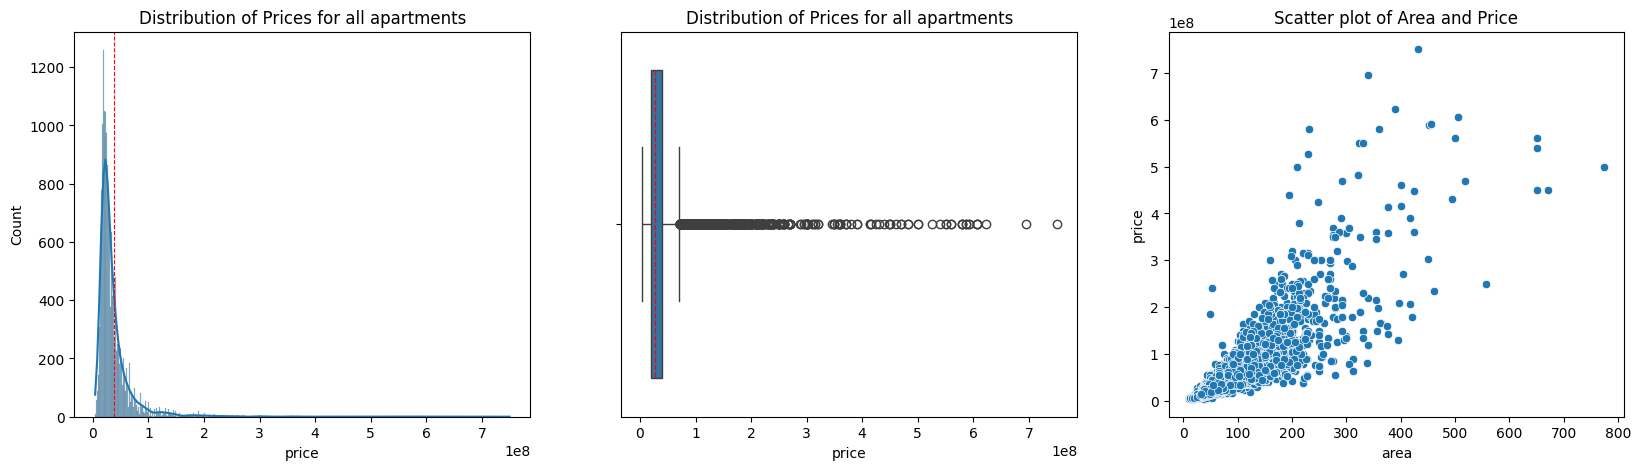

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5)) 

sns.histplot(data['price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices for all apartments')
axes[0].axvline(data['price'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['price'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set_title('Distribution of Prices for all apartments')

sns.scatterplot(x='area', y='price', data=data, ax=axes[2])
axes[2].set_title('Scatter plot of Area and Price')

plt.show()

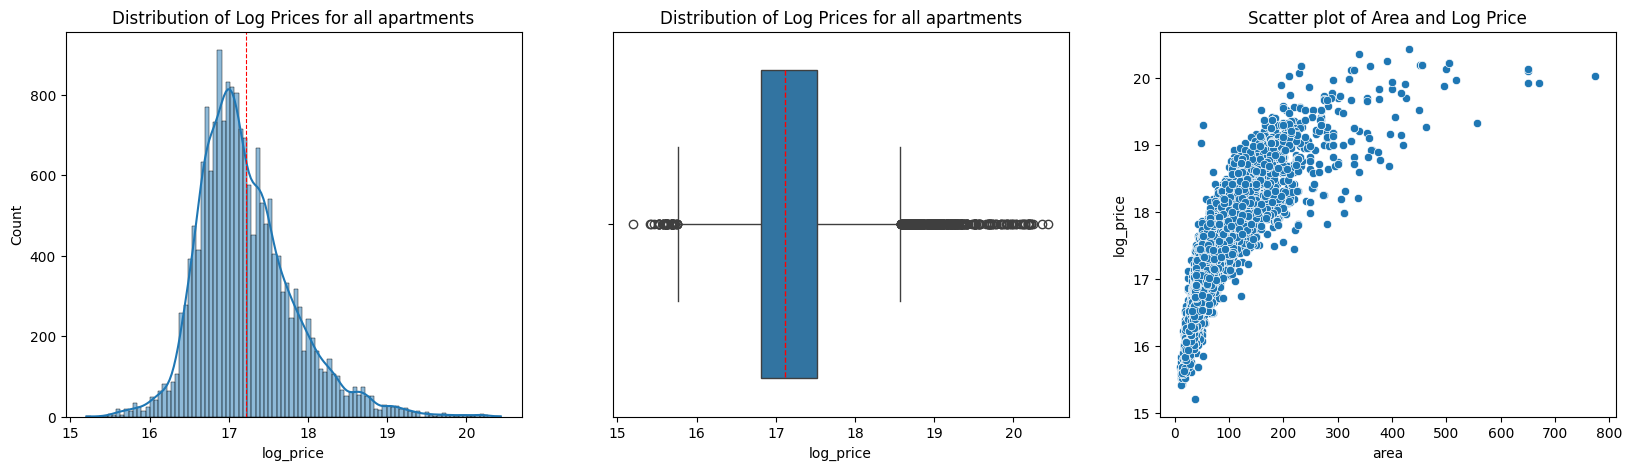

In [30]:
# Applying a logarithmic transformation to the price data
data['log_price'] = np.log(data['price'])

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data['log_price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Log Prices for all apartments')
axes[0].axvline(data['log_price'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['log_price'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set_title('Distribution of Log Prices for all apartments')

sns.scatterplot(x='area', y='log_price', data=data, ax=axes[2])
axes[2].set_title('Scatter plot of Area and Log Price')

plt.show()

### Since the target variable is far from a normal distribution, we use the logarithm-transformed price for prediction.

## Encoding

In [31]:
# Drop irrelevant columns
irrelevant_columns = ['name', 'information', 'address', 'price',  'coordinates', 'kzt_sq_m', 'condition', 'bathroom_info']
data.drop(irrelevant_columns , axis=1, inplace=True)

# Label encoding for the 'elevator' column
label_encoder = LabelEncoder()
data['elevator'] = label_encoder.fit_transform(data['elevator'])

# Ordinal encoding for the 'complex_class' column
complex_class_order = ['economy', 'comfort', 'business', 'premium']  
complex_class_ordinal_encoder = OrdinalEncoder(categories=[complex_class_order])
data['complex_class'] = complex_class_ordinal_encoder.fit_transform(data[['complex_class']])

# Replace values of complex_name that occur less than 35 times with 'others'
category_counts = data['complex_name'].value_counts()
categories_to_replace = category_counts[category_counts < 35].index
data.loc[data['complex_name'].isin(categories_to_replace), 'complex_name'] = 'others'

# Binary encoding for the 'complex_name' column
encoder = BinaryEncoder(cols=['complex_name'])
data_encoded = encoder.fit_transform(data['complex_name'])
data = pd.concat([data, data_encoded], axis=1)
data.drop(['complex_name'], axis=1, inplace=True)

# One-hot encoding for nominal categorical features
nominal_categorical_features = ['parking', 'district', 'house_type', 'ceiling_height', 'owner']
data = pd.get_dummies(data, columns=nominal_categorical_features)

## Splitting data

In [32]:
# Split the data into training and testing sets
X = data.drop('log_price', axis=1)
y = data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (14678, 105)
Test shape: (3670, 105)


## Model training and prediction

In [34]:
def mean_relative_error(y_true, y_pred):
    """
    Calculate the mean relative error between true and predicted values.

    Args:
    y_true (array-like): Array of true values.
    y_pred (array-like): Array of predicted values.

    Returns:
    float: Mean relative error.
    """
    
    # Exponentiate the true and predicted values to get back the original scale
    y_true_exp = np.exp(y_true) 
    y_pred_exp = np.exp(y_pred)
    relative_errors = np.abs((y_true_exp - y_pred_exp) / y_true_exp)
    return np.mean(relative_errors)

In [33]:
# Create and train the baseline model (in this case - linear regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict prices on the test dataset
y_pred = baseline_model.predict(X_test)

# Evaluate the performance of the baseline model
mre = mean_relative_error(y_test, y_pred)
print("MRE of the baseline model:", mre)

MRE of the baseline model: 0.1736760369194032


## Results interpretation

### The baseline model indicates that the model has an error of approximately 17%

In [35]:
pd.DataFrame({'Test': np.exp(y_test), 'Pred': np.round(np.exp(y_pred))}).head(20)

,Test,Pred
12562,32000000.0,26544512.0
4304,38500000.0,39069620.0
5836,65000000.0,62424668.0
11919,26000000.0,26503396.0
9923,11500000.0,10829633.0
11872,185000000.0,191843874.0
4410,59900000.0,49828305.0
13952,23000000.0,20199355.0
13708,40535010.0,53525046.0
12714,25000000.0,24003926.0
